<a href="https://colab.research.google.com/github/bloomfieldfong/Analizador-Lexico/blob/master/Proyecto1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file = "proyecto_training_data.npy"
raw_data = np.load(file)
header = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGrd","YearBuilt","LotFrontage"]
data = pd.DataFrame(raw_data,columns=header)


Separacion de datos de entrenamiento y de pruebas


In [137]:
##Separacion de la data en 80% y 20%    
training_data = raw_data[:1168,:]
test_data = raw_data[1168:,:]

print(training_data.shape)
print(test_data.shape)

(1168, 6)
(292, 6)



# **Analisis exploratorio**

Se establecio un correlativo para cada una de las columnas de nuestro data frame:

* 0 SalesPrice 
* 1 OverallQual
* 2 1stFlrSF (First Floor square feet) 
* 3 TotRmsAbvGrd 
* 4 YearBuilt 
* 5 LotFrontage

In [138]:
data.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


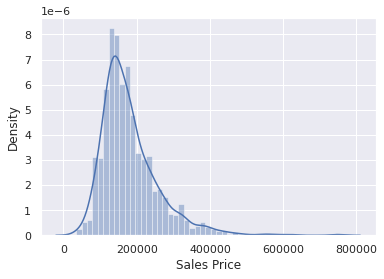

In [139]:
sns.set_theme()
sales_price_plot_data = pd.Series(data['SalePrice'], name="Sales Price")
sales_price_plot = sns.distplot(sales_price_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


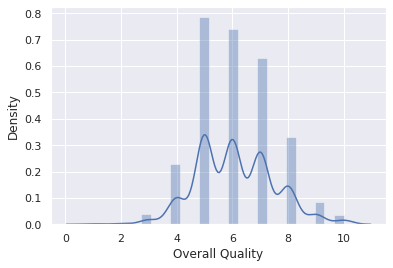

In [140]:
sns.set_theme()
OverallQual_plot_data = pd.Series(data['OverallQual'], name="Overall Quality")
OverallQual_plot = sns.distplot(OverallQual_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


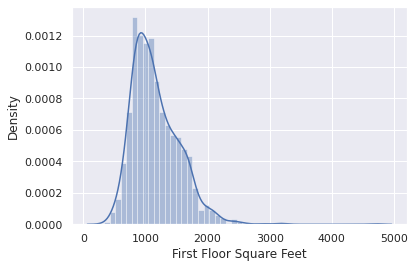

In [141]:
sns.set_theme()
FirstFlrSF_plot_data = pd.Series(data['1stFlrSF'], name="First Floor Square Feet")
FirstFlrSF_plot = sns.distplot(FirstFlrSF_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


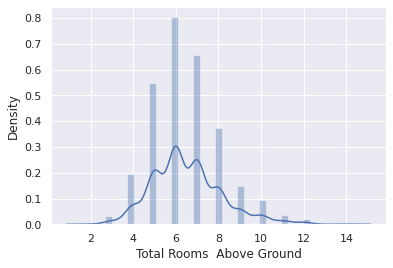

In [142]:
sns.set_theme()
TotRmsAbvGrd_plot_data = pd.Series(data['TotRmsAbvGrd'], name="Total Rooms  Above Ground")
TotRmsAbvGrd_plot = sns.distplot(TotRmsAbvGrd_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


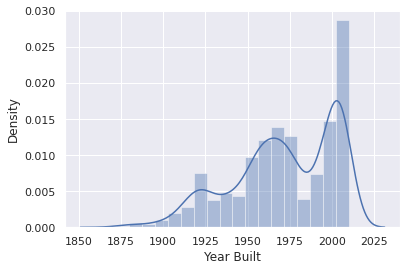

In [143]:
sns.set_theme()
YearBuilt_plot_data = pd.Series(data['YearBuilt'], name="Year Built")
YearBuilt_plot = sns.distplot(YearBuilt_plot_data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


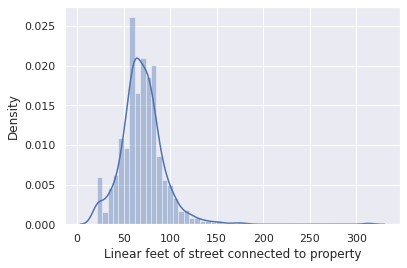

In [144]:
sns.set_theme()
LotFrontage_plot_data = pd.Series(data['LotFrontage'], name="Linear feet of street connected to property")
LotFrontage_plot = sns.distplot(LotFrontage_plot_data)

# **Correlación entre variables**

Text(0, 0.5, 'OverallQuality')

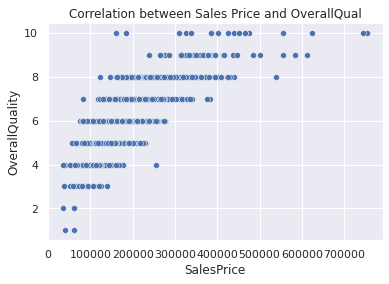

In [145]:
corrSaleQuality = sns.scatterplot(x=data['SalePrice'], y=data['OverallQual'], data=data)
corrSaleQuality.set_title("Correlation between Sales Price and OverallQual")
corrSaleQuality.set_xlabel("SalesPrice")
corrSaleQuality.set_ylabel("OverallQuality")


Text(0, 0.5, 'First Floor square feet')

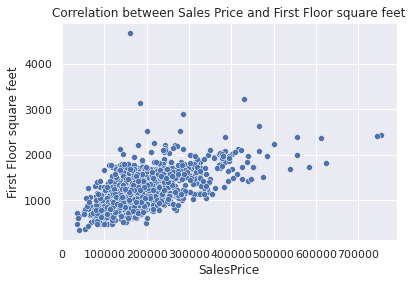

In [146]:
corrSale1stFlrSF = sns.scatterplot(x=data['SalePrice'], y=data['1stFlrSF'], data=data)
corrSale1stFlrSF.set_title("Correlation between Sales Price and First Floor square feet")
corrSale1stFlrSF.set_xlabel("SalesPrice")
corrSale1stFlrSF.set_ylabel("First Floor square feet")


Text(0, 0.5, 'Total rooms above grade')

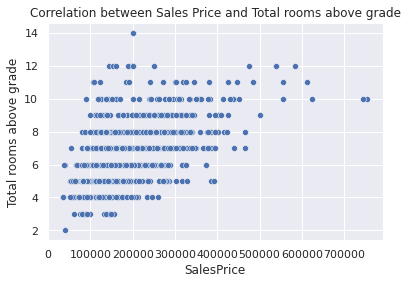

In [147]:
corrSaleTotRmsAbvGrd = sns.scatterplot(x=data['SalePrice'], y=data['TotRmsAbvGrd'], data=data)
corrSaleTotRmsAbvGrd.set_title("Correlation between Sales Price and Total rooms above grade")
corrSaleTotRmsAbvGrd.set_xlabel("SalesPrice")
corrSaleTotRmsAbvGrd.set_ylabel("Total rooms above grade")

Text(0, 0.5, 'Year Built')

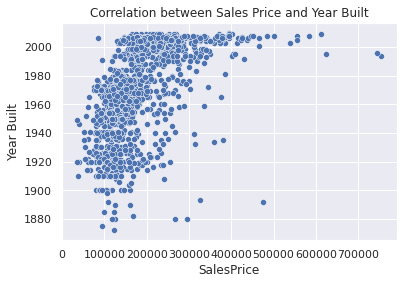

In [148]:
corrSaleYearBuilt= sns.scatterplot(x=data['SalePrice'], y=data['YearBuilt'], data=data)
corrSaleYearBuilt.set_title("Correlation between Sales Price and Year Built")
corrSaleYearBuilt.set_xlabel("SalesPrice")
corrSaleYearBuilt.set_ylabel("Year Built")

Text(0, 0.5, 'Lot Frontage')

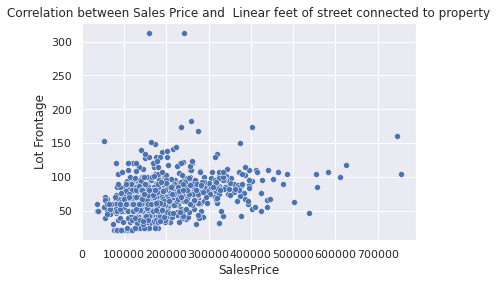

In [149]:
corrSaleLotFrontage= sns.scatterplot(x=data['SalePrice'], y=data['LotFrontage'], data=data)
corrSaleLotFrontage.set_title("Correlation between Sales Price and  Linear feet of street connected to property")
corrSaleLotFrontage.set_xlabel("SalesPrice")
corrSaleLotFrontage.set_ylabel("Lot Frontage")

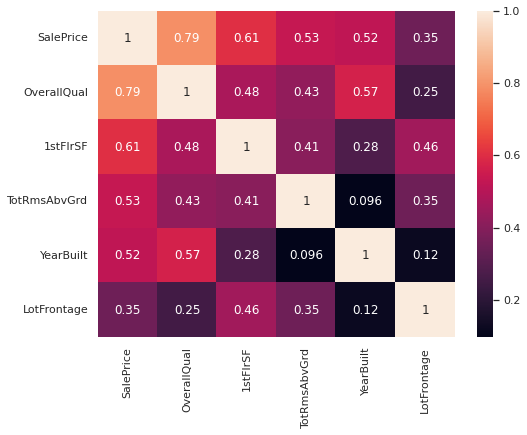

In [150]:
correlation_table = data.corr(method='pearson')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_table, annot=True)
plt.show()

Se realizo un mapa de calor de los valores de correlación y se grafico para cada variable una gráfica scatter con la variable Sales Price para saber que datos tienen mayor linearidad con la variable que queremos predecir. 
La columna 0 es la que debemos observar en el mapa de calor ya que nuestra predicción estará entorno a la variable Sales Price. 
En base a lo observado en las correlaciones de cada una de las variales y en el mapa de calor se estara utilizando las variables OverallQual y 1stFlrSF. 

# **Modelo de predicción**

In [151]:
def modelo(x,y, epochs, imprimir_error_cada, learning_rate):
  ## m y b inicializados en 0 
  mb = np.array([0.0,0.0]) 
  x = x.reshape(len(x), 1)
  ones = np.ones(len(x)).reshape(len(x), 1)
  ##creacion de la vector x [valorx, 1]
  x = np.append(x, ones, axis = 1)
  error = np.zeros(epochs)
  modelo = np.ones((epochs,2))
  ##duplicamos la data para el modelo
  for i in range(epochs):
    ##calculo de yhat
    yhat = np.dot(x,mb)
    error[i] = (np.average((y-yhat)**2))/2
    ##calculo del gradiente con la tabla x [val_x, 1]
    gradiente = np.dot(yhat-y, x) / len(y)
    ## Actualizacion de parametros
    mb -= (learning_rate * gradiente)
    modelo[i] = mb
    ## calculo del error cada x tiempo
    if ((i+1) % imprimir_error_cada) == 0:
        print("Error Iteracion: "+ str(i+1)+" "+str(error[i]))
  return modelo, error

In [152]:
training_data[:,1]

modelo, errores = modelo(training_data[:,1],training_data[:,0],1000,100,0.0001)

Error Iteracion: 100 9529508397.186686
Error Iteracion: 200 5038410635.51504
Error Iteracion: 300 3026467600.11068
Error Iteracion: 400 2125076747.3682768
Error Iteracion: 500 1721164452.2871947
Error Iteracion: 600 1540100749.056787
Error Iteracion: 700 1458863515.8884373
Error Iteracion: 800 1422344263.7205887
Error Iteracion: 900 1405856817.9830375
Error Iteracion: 1000 1398342860.278944
